## FINANCIAL DATA

MODULE 3 | LESSON 3


---

# ANALYZING COSTS AND BENEFITS OF OWNING AN ETF

|  |  |
|:---|:---|
|**Reading Time** |  30 minutes |
|**Prior Knowledge** | ETFs, Stocks, Returns, Diversification  |
|**Keywords** | Expense Ratio, Survivorship Bias, Active vs. Passive Investing |

---

*In the last lesson, we showcased the benefits of diversification to a portfolio. Here, we will show how to effectively tap into those diversification benefits through owning an ETF.*

In [ ]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import yfinance as yfin

yfin.pdr_override()

## 1. Analyzing Exchange Traded Funds (ETFs)

For this lesson, we will continue building upon the analytical tools we've learned in previous lessons to further examine exchange traded funds (ETFs). To this point, we have used ETFs a few times already like, when we used BLV as a proxy for bonds, but in this lesson we will go into further detail about ETFs and what makes them such an important investing tool. 

### 1.1 ETF Benefits
* Diversification: exchange traded funds essentially have some form of diversification built in already. We went over the benefits of diversification in the last lesson and that is built into the DNA of what an ETF is. For example, you can invest in the SPDR S&P 500 ETF Trust(SPY) which tracks the S&P 500. This allows you to effectively invest in 500 companies at once instead of actually having to buy the stocks of 500 companies individually. You can reap the diversification benefits from this. Most ETFs even rebalance every quarter so you don't have to worry about that either.

* Survivorship Bias: There are a lot of ETFs, some of which follow strict rules on which companies can be included or not. Let's say we have an ETF called ABC. ABC requires companies to have over a \\$100mn market cap. This means that anytime one of the holding comapnies within ABC falls below \\$100 million, the ETF is forced to sell it and buy a new company. This introduces a clear bias to only hold onto companies that are doing well. This can be a huge benefit to investors in certain situations.

* Broader Predictions: ETFs allow you to make a prediction without being an expert in a certain industry - Let's say you expected the semiconductor market to do well over the next year but didn't know specifically which company to buy. ETFs simplify this thought process by allowing you to buy into one ETF, which contains shares of individual semiconductor stocks  


Let's explore these benefits in a bit more detail starting from the top.

### 1.2 ETF Benefits: Diversification
Although you probably get the theme of these lessons by now, we will use a lesson to best illustrate the benefits of diversification through ETFs. Imagine the year is 2006 and your two friends Elaine and Jerry both conclude that banks and financial institutions will be fantastic long-term investments for the next 15+ years. Jerry is confident with his stock-picking skills, so he decides he's going to invest all of his money into a company he can't imagine in a million years could fail, Lehman Brothers. Elaine doesn't know as much about specific financial institutions and what to invest in, so she decides she will just invest her money into an ETF, XLF. XLF is the Financial Select Sector SPDR Fund; it contains exposure to the U.S. financials sector. It's cap-weighted, S&P 500-only portfolio, which means that it’s concentrated in large banks and avoids small-caps (XLF).

If you had to guess, who do you think had better performance since the start of 2006? You can probably see where this is going. If you're unaware, Lehman Brothers famously collapsed in 2008 and filed for the largest bankruptcy in U.S. history. This means Jerry likely lost his entire initial investment.


**Figure 1: Lehman Brothers Market Cap**

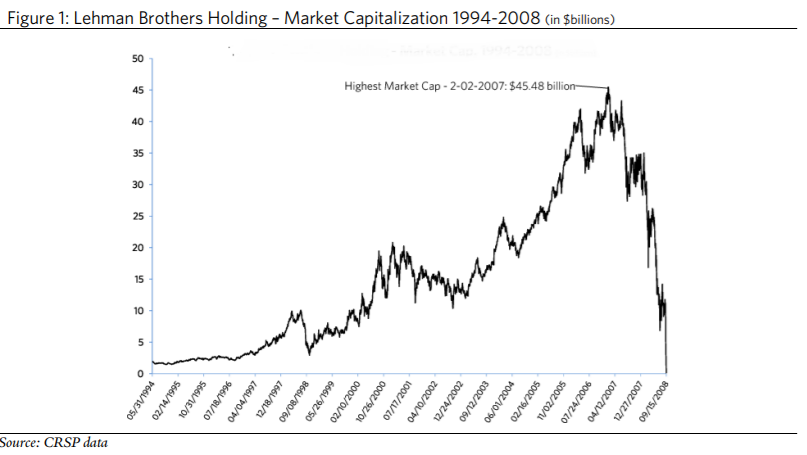
###### Source: Wiggins, Rosalind Z.; Piontek, Thomas; and Metrick, Andrew (2019) "The Lehman Brothers Bankruptcy A: Overview," *The Journal of Financial Crises*: Vol. 1 : Issue. 1, 39-62.,(https://elischolar.library.yale.edu/cgi/viewcontent.cgi?article=1000&context=journal-of-financial-crises)


Let's examine what happened to XLF during this time period and see how it held up:


In [ ]:
start = datetime.date(2006, 1, 1)
end = datetime.date(2021, 11, 28)
# end = datetime.date.today()
prices = pd.DataFrame(web.DataReader(["XLF"], start, end)["Adj Close"])
prices = prices.rename(columns={"Adj Close": "XLF"})
prices = prices.dropna()

In [ ]:
# set figure size
plt.figure(figsize=(12, 5))

# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot(x="Date", y="XLF", data=prices, label="Daily XLF 500 Prices");

Lehman Brothers collapse had a profound effect on the financial industry as seen in the above chart. They had lots of different exposure to different financial institutions and for a variety of reasons, the U.S. economy went into the worst recession since the Great Depression. If we just take a moment to look at the period from 2006 to the start of 2010 and compare the min and max of the data at this time, you can see that XLF lost 82.7% as its max drawdown. 

In [ ]:
drawdown = (
    prices["2006-01-01":"2010-01-01"].max() - prices["2006-01-01":"2010-01-01"].min()
) / prices["2006-01-01":"2010-01-01"].max()
100 * drawdown.round(3)

I'm sure near the start of 2010, Elaine would be distraught over her investment since XLF was performing horribly. As sad as she would be, Jerry would be more upset since his investing account is now worth \\$0 with no way to recoup his initial investment. Lucky for Elaine, she's a patient person so instead of taking a massive loss, she decided she would just wait and hold. Let's see her percentage return from the start of 2006 to today:

In [ ]:
(100 * (prices.XLF[-1] - prices.XLF[0]) / prices.XLF[0]).round(2)

By having the benefits of diversification through an ETF and by being patient, Elaine would've ended up with a 104.82% return since 2006. If she invested \\$10,000 dollars into the fund then while Jerry invested \\$10,000 into Lehman Brothers, he would be left with \\$0 while Elaine would be sitting on about $20,482. This is just one example of many illustrating the benefits of diversification through ETFs.

### 1.3 ETF Benefits - Survivorship Bias
Many ETFs have to follow certain rules for which companies they can hold: this has a sort of built in survivorship bias, which can help investors. For example, consider the Dow Jones Industrial Average (DJIA), which is one of the oldest equity indices on Earth. This index was created by Charles Dow in 1896 with the following original components:

* American Cotton Oil 
* American Sugar 
* American Tobacco
* Chicago Gas 
* Distilling & Cattle Feeding 
* General Electric 
* Laclede Gas 
* National Lead 
* North American 
* Tennessee Coal Iron and RR 
* U.S. Leather 
* United States Rubber 

General Electric is likely the only one you have heard of out of these and is the only company from this list still with its original name. The rest of them have been dissolved or spun off into different companies. Considering this, you would expect the Dow Jones Industrial Average to be struggling, but that's not the case. DJIA hit an all-time low during the summer of 1890 where the index hit a price of 28.48. Fast forward to 2021 and the index is at \\$35,754.69 as of December 9th, 2021. This is clearly not an index in bad shape. This is because over time, as views change regarding what should constitute the DJIA, companies were removed and added. In fact, General Electric has been removed twice throughout it's history, finally in 2018 as it is no longer on the index today (S&P Dow Jones Indices).

Clearly, ETFs were not available during the Dow's inception as they've only become widely available over the past couple of decades, but you can still see why this survivorship bias can help you as an owner of an ETF.  

### 1.4 Expense Ratios
One thing to consider before buying an ETF is the expense ratio. This is written as a percentage of the net asset value of each fund. The expense ratio is used to pay for many different things like the salaries of the managers, marketing, administration, distribution, and any other expenses. Typically, the expense ratio of ETFs is much lower than that of mutual funds, which is one of the reasons why ETFs have become so popular in recent years comparatively. 

#### 1.4.1 How can we calculate the expense ratio of an ETF
We can use SPY as an example; it has a 0.094% expense ratio. Now, if you calculate returns like we have been, you may notice that the expense ratio is built into the price. This means that when you buy an ETF, you won't get a charge for the annual expense ratio; it will just be reflected in your returns. 

Let's use a hypothetical ETF to illustrate how the expense ratio is calculated. Assume we invest into hypothetical ETF, ABC with:
* \\$10,000 initial investment
* Cost of one share of the ABC is \\$5,000
* After one year, the underlying assets are worth \\$6,000 per share
* Expense ratio is 0.5%

How much money do we have in our account at the end of the year assuming the expense ratio wasn't taken out yet? 

We can calculate the cost per share using the final value at the end of the year - \\$6,000


In [ ]:
6000 * 0.005

This means at the current price we're losing \\$30 a year annually per share. Multiply this by two shares and our final portfolio value at the end of the year is:

In [ ]:
(6000 - 30) * 2

Instead of having a portfolio value of \\$12,000 by the end of the year, it's worth \\$11,940 when taking into account the expense ratio. This may not seem like a lot, but not all expense ratios are created equally and we must take this into consideration before investing into an ETF. If a portfolio is unchanged at the end of the year, then it loses the expense ratio, since the return was 0 before expenses.

### 1.5 Active versus Passive ETFs
When ETFs were initially invented, they were designed to allow investors to invest into funds that track indices like the S&P 500, Dow Jones Industrial Average, etc. These would be considered passive funds since their sole purpose was to track an underlying index.

This purpose has evolved over time, and today there are many ETFs you can invest in that track a portfolio manager instead of an index. For example, there is the ARK Innovation ETF (ARKK) with an expense ratio of 0.75%, which is on the high side compared to many passive ETFs. This fund tracks the investments by famous investor, Cathie Wood. These actively managed funds tend to have higher expense ratios than passive funds

## 2. Conclusion
This lesson we went over the nuances of owning an ETF along with how we can take advantage of their built-in diversification benefits. In the next lesson of this module, we will cover situations where diversification fails and how we can quantify that


**References**

- XLF ETF Report. ETF.com, https://www.etf.com/XLF. Accessed 23 March 2022.

- S&P Dow Jones Indices. *Dow Jones Industrial Average - Historical Components. S&P Global*, https://www.spglobal.com/spdji/en/documents/education/spdji-djia-historical-component-changes.pdf. Accessed 23 March 2022.

- Wiggins, Rosalind Z.; Piontek, Thomas; and Metrick, Andrew (2019) "The Lehman Brothers Bankruptcy A: Overview," *The Journal of Financial Crises*: Vol. 1 : Issue. 1, 39-62. https://elischolar.library.yale.edu/journal-of-financial-crises/vol1/iss1/2

---
Copyright 2023 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
